In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter

In [2]:
def load_xvg_file(filename):
    x, y = [], []
    with open(filename) as f:
        for line in f:
            cols = line.split()
            if len(cols)==2:
                x.append(cols[0])
                y.append(cols[1])
    return np.array(x[1:],dtype=float),np.array(y[1:],dtype=float) #skip the first value (header)


In [4]:
def gaussian(x,a,b,c):
    return np.abs(a)*np.exp(-4*np.log(2)*(x-b)**2./(c**2))

def fit(function,x,y,p0=None,sigma=None,bounds=None):
    '''
    fits a function and return the fit resulting parameters and curve
    '''
    popt,pcov = curve_fit(function,x,y,p0=p0,sigma=sigma)
    #x = np.arange(min(x),max(x),x[1]-x[0])
    curve = function(x,*popt)
    perr = np.sqrt(np.diag(pcov))
    return popt,x,curve,perr

Text(0.5, 1.0, 'Energy minimization')

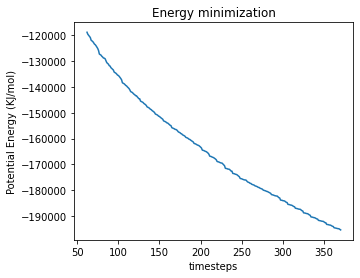

In [5]:
plt.figure(figsize=[5,4])

filename = "../mdf/em_potential.xvg"
x,y = load_xvg_file(filename)
plt.plot(x[50:],y[50:],lw=1.5)
plt.ylabel('Potential Energy (KJ/mol)')
plt.xlabel('timesteps')

plt.title('Energy minimization')

Text(0.5, 0, 'time (ns)')

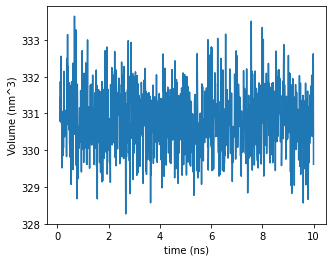

In [75]:
plt.figure(figsize=[5,4])

filename = "../mdf/npt_volume.xvg"
x,y = load_xvg_file(filename)
plt.plot(x[10:]/1e3,y[10:],lw=1.5)
plt.ylabel('Volume (nm^3)')
plt.xlabel('time (ns)')

Text(0.5, 0, 'q ($\\rm \\AA^{-1}$)')

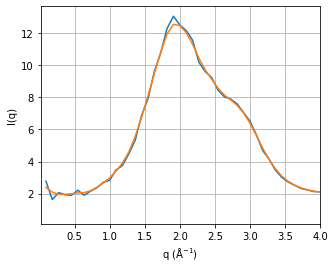

In [3]:
plt.figure(figsize=[5,4])

filename = "../mdf/npt_sq.xvg"
x,y = load_xvg_file(filename)
plt.plot(x[1:]/10,y[1:])
plt.plot(x[1:]/10,gaussian_filter(y[1:],sigma=1),lw=1.5)
plt.xlim(0.02,4)
#plt.ylim(1.5,4)
plt.grid()
plt.ylabel('I(q)')
plt.xlabel(r'q ($\rm \AA^{-1}$)')

In [60]:
q, Iq = x[1:]/10,gaussian_filter(y[1:],sigma=2)
print(q[Iq==max(Iq)])
print(q[0])

[2.001087]
0.09095800000000001
